In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def add_time_features(df):
    df['OutDate'] = pd.to_datetime(df['OutDate'])
    df['Sales'] = df['Sales'].astype('category')
    df['Customer'] = df['Customer'].astype('category')
    df['Product'] = df['Product'].astype('category')
    df['ProductID'] = df['ProductID'].astype('category')
    df['Year'] = df['OutDate'].dt.year
    df['Month'] = df['OutDate'].dt.month
    df['Day'] = df['OutDate'].dt.day
    df['Weekday'] = df['OutDate'].dt.weekday
    return df

### Data Preparation


In [ ]:
df = pd.read_csv('Sales_Summary.csv')

df = add_time_features(df)

df.head()

,OutDate,Sales,Customer,Product,ProductID,OutCountTotal,TotalSales,TotalSales_LocalPrice,Year,Month,Day,Weekday
0,2021-04-20,Aswathi Damodaran,Organic Connections,T5115_Calendula ORG 24TB,CT013260047,5100.0,0.00,0.00,2021,4,20,1
1,2021-04-27,Aswathi Damodaran,TFI Company Inc.,TFI_Box ION_IQ Ionizer_Insert,CT002950025,1650.0,1995.02,1995.02,2021,4,27,1
2,2021-08-24,Aswathi Damodaran,Spectrum Manufacturing Inc,Spe_00000_VISTA_Lid,CT015200004,1050.0,6478.29,6478.29,2021,8,24,1
3,2022-05-02,Becky Wang,Hartmann Packaging,3K-000012-00 - Goldhen LAA BR CA VF PR,CT013840087,112500.0,11644.65,11644.65,2022,5,2,0
4,2022-09-01,Becky Wang,Max Printing Center,Pri-med medical products,CT022460001,123200.0,32179.78,32179.78,2022,9,1,3


In [ ]:
df.dtypes

OutDate                  datetime64[ns]
Sales                          category
Customer                       category
Product                        category
ProductID                      category
OutCountTotal                   float64
TotalSales                      float64
TotalSales_LocalPrice           float64
Year                              int64
Month                             int64
Day                               int64
Weekday                           int64
dtype: object

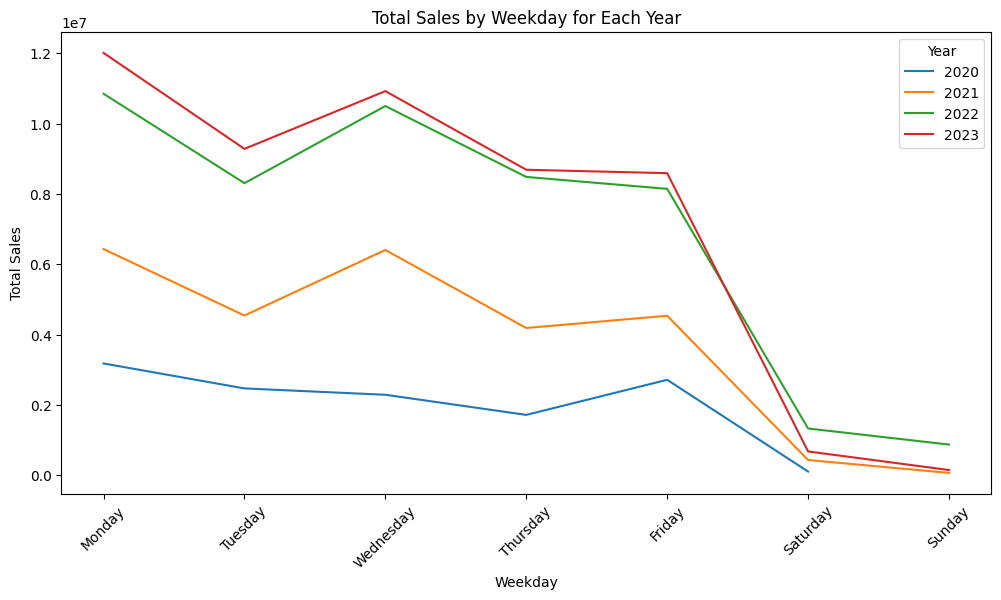

In [ ]:
# Group by Year and Weekday
grouped_data = df.groupby(['Year', 'Weekday'])['TotalSales'].sum().reset_index()

# Mapping numbers to weekday names
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

grouped_data['Weekday'] = grouped_data['Weekday'].map(weekday_map)

plt.figure(figsize=(12, 6))

# Get unique years
years = grouped_data['Year'].unique()

for year in years:
    # Filter data for each year
    yearly_data = grouped_data[grouped_data['Year'] == year]

    # Plot
    sns.lineplot(x='Weekday', y='TotalSales', data=yearly_data, label=str(year))

plt.title('Total Sales by Weekday for Each Year')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


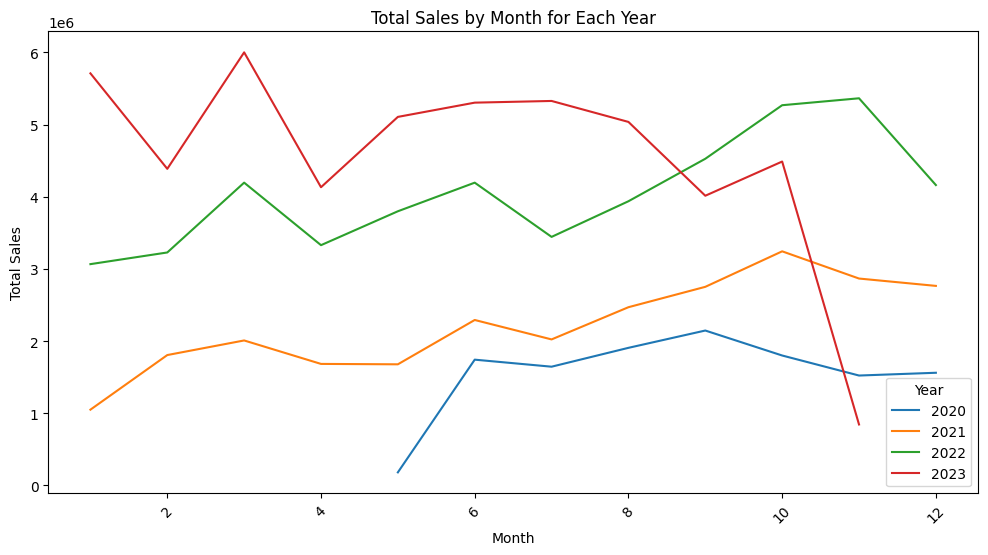

In [ ]:
grouped_data = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

plt.figure(figsize=(12, 6))

# Get unique years
years = grouped_data['Year'].unique()

for year in years:
    # Filter data for each year
    yearly_data = grouped_data[grouped_data['Year'] == year]

    # Plot
    sns.lineplot(x='Month', y='TotalSales', data=yearly_data, label=str(year))

plt.title('Total Sales by Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.show()


<ipython-input-25-28438b9d8797>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)
<ipython-input-25-28438b9d8797>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])


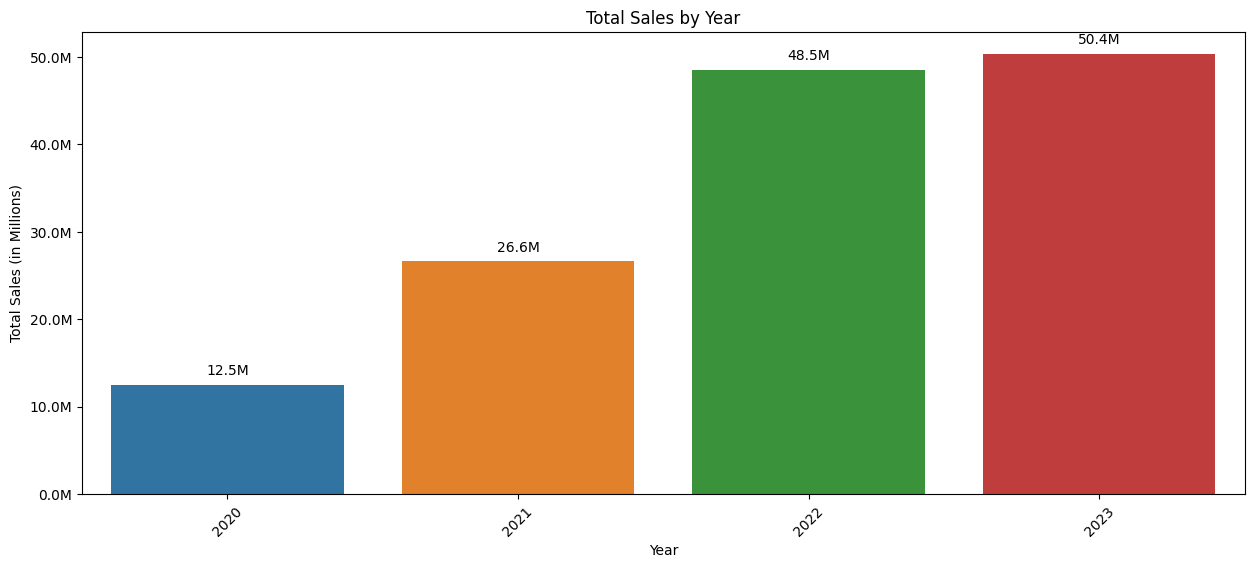

<ipython-input-25-28438b9d8797>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)
<ipython-input-25-28438b9d8797>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])


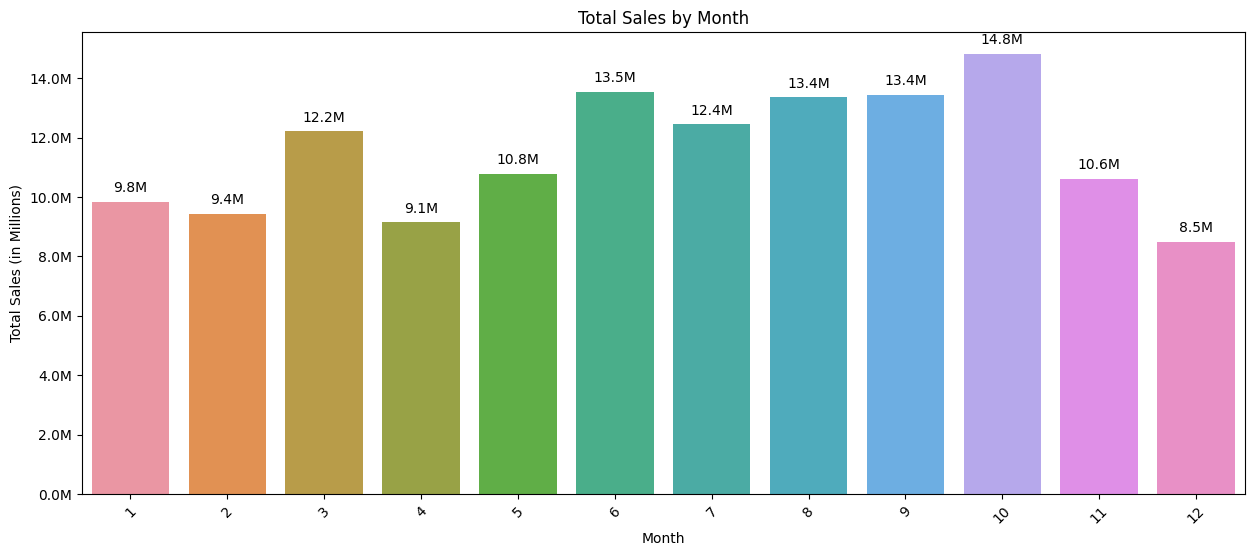

<ipython-input-25-28438b9d8797>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)
<ipython-input-25-28438b9d8797>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])


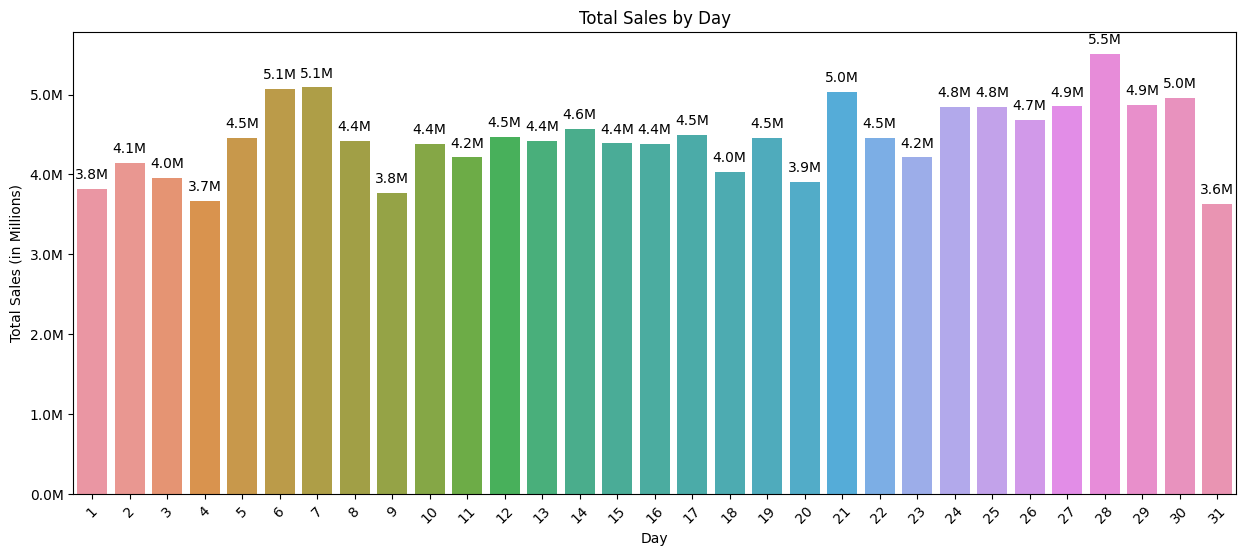

<ipython-input-25-28438b9d8797>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)
<ipython-input-25-28438b9d8797>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])


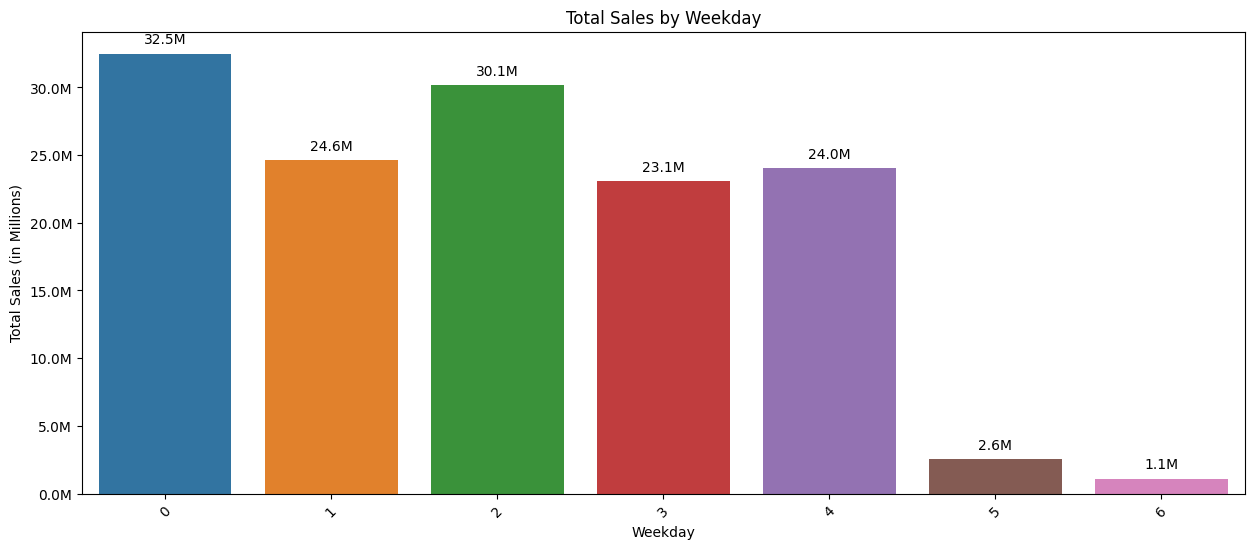

<ipython-input-25-28438b9d8797>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)
<ipython-input-25-28438b9d8797>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])


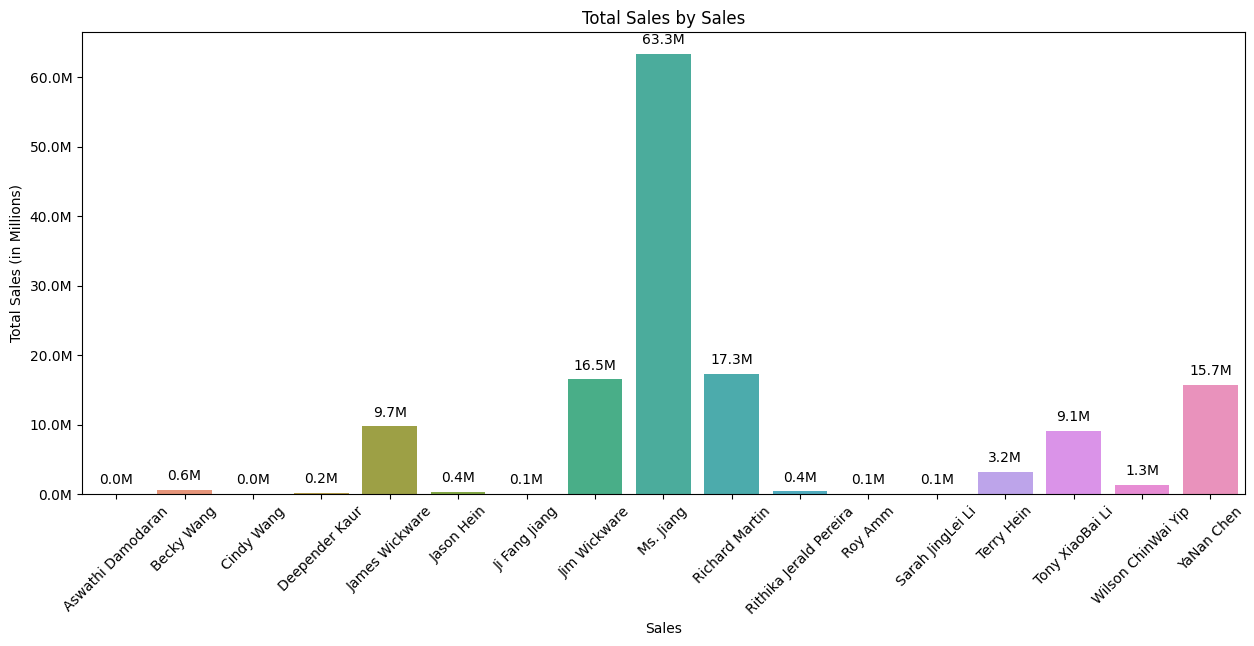

In [ ]:
# List of dimensions for which you want to plot summaries
dimensions = ['Year', 'Month', 'Day', 'Weekday', 'Sales']

for dimension in dimensions:
    plt.figure(figsize=(15, 6))
    ax = sns.barplot(x=dimension, y='TotalSales', data=df, estimator=lambda x: sum(x) / 1e6, ci=None)

    # Format y-axis in millions
    ax.set_ylabel('Total Sales (in Millions)')
    ax.set_yticklabels([f'{y:.1f}M' for y in ax.get_yticks()])

    # Add labels on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}M',  # Format the label in millions
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position for the label
                    ha='center', va='center',  # Alignment
                    xytext=(0, 10),  # Distance from the bar
                    textcoords='offset points')

    plt.title(f'Total Sales by {dimension}')
    plt.xticks(rotation=45)  # Rotate labels for better readability if needed
    plt.xlabel(dimension)
    plt.show()

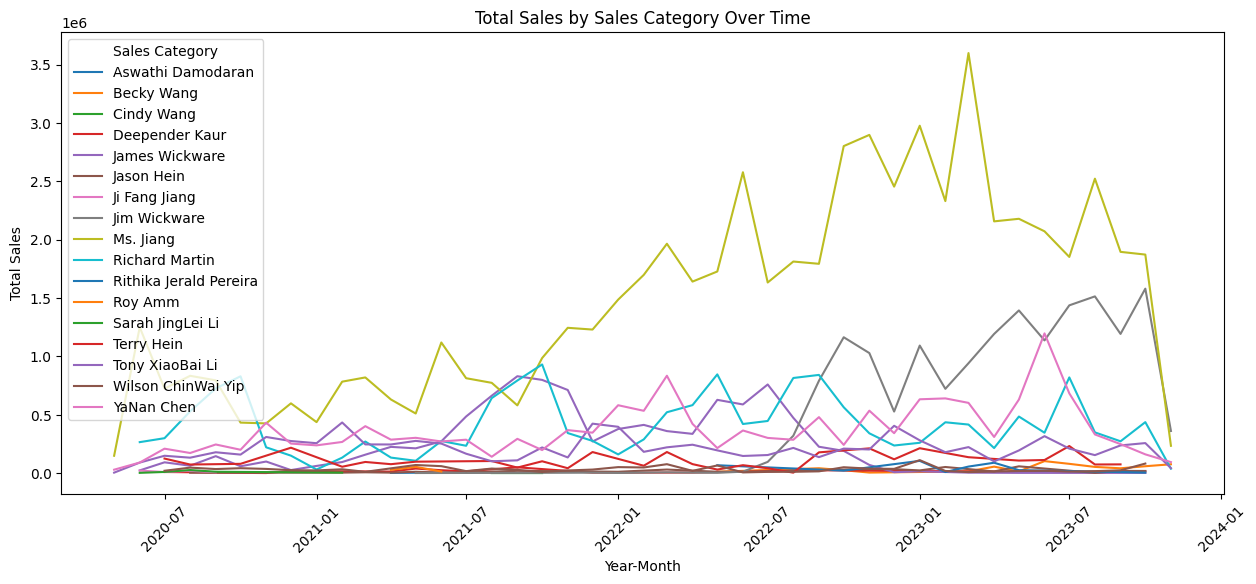

In [ ]:
df['YearMonth'] = df['OutDate'].dt.to_period('M')
sales_categories = df['Sales'].unique()

# Set the size of the plots
plt.figure(figsize=(15, 6))

# Loop through each sales category and plot
for sales_category in sales_categories:
    # Filter data for the current category
    category_data = df[df['Sales'] == sales_category]

    # Group by YearMonth and sum the TotalSales
    grouped_data = category_data.groupby('YearMonth')['TotalSales'].sum().reset_index()

    # Plot
    plt.plot(grouped_data['YearMonth'].dt.to_timestamp(), grouped_data['TotalSales'], label=sales_category)

# Add plot details
plt.title('Total Sales by Sales Category Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Category')
plt.show()

In [ ]:
df

,OutDate,Sales,Customer,Product,ProductID,OutCountTotal,TotalSales,TotalSales_LocalPrice,Year,Month,Day,Weekday,YearMonth
0,2021-04-20,Aswathi Damodaran,Organic Connections,T5115_Calendula ORG 24TB,CT013260047,5100.0,0.00,0.00,2021,4,20,1,2021-04
1,2021-04-27,Aswathi Damodaran,TFI Company Inc.,TFI_Box ION_IQ Ionizer_Insert,CT002950025,1650.0,1995.02,1995.02,2021,4,27,1,2021-04
2,2021-08-24,Aswathi Damodaran,Spectrum Manufacturing Inc,Spe_00000_VISTA_Lid,CT015200004,1050.0,6478.29,6478.29,2021,8,24,1,2021-08
3,2022-05-02,Becky Wang,Hartmann Packaging,3K-000012-00 - Goldhen LAA BR CA VF PR,CT013840087,112500.0,11644.65,11644.65,2022,5,2,0,2022-05
4,2022-09-01,Becky Wang,Max Printing Center,Pri-med medical products,CT022460001,123200.0,32179.78,32179.78,2022,9,1,3,2022-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18496,2023-11-06,YaNan Chen,Riverside Natural Foods,RNF_GB_US_Chocolate chip,CT009050003,209450.0,24988.52,24988.52,2023,11,6,0,2023-11
18497,2023-11-07,YaNan Chen,Bold Canine Inc,BBN_4LB Mega MegaBlend,CT021760002,5650.0,4149.93,4149.93,2023,11,7,1,2023-11
18498,2023-11-07,YaNan Chen,Bold Canine Inc,BBN-4LB-Mega-Turkey,CT021760016,6270.0,4605.32,4605.32,2023,11,7,1,2023-11
18499,2023-11-03,YaNan Chen,Lake City Foods,LAK_CTRN-ALDI-COUSP_Aldi Couscous Parmesan,CT012680061,99360.0,9352.66,9352.66,2023,11,3,4,2023-11


In [ ]:
total_sales_df = df.groupby('OutDate')['TotalSales'].sum().reset_index()
total_sales_df

,OutDate,TotalSales
0,2020-05-20,17334.61
1,2020-05-22,35447.07
2,2020-05-25,18010.53
3,2020-05-26,37692.22
4,2020-05-27,22220.01
...,...,...
969,2023-11-01,164366.04
970,2023-11-02,230607.84
971,2023-11-03,80516.91
972,2023-11-06,227714.93


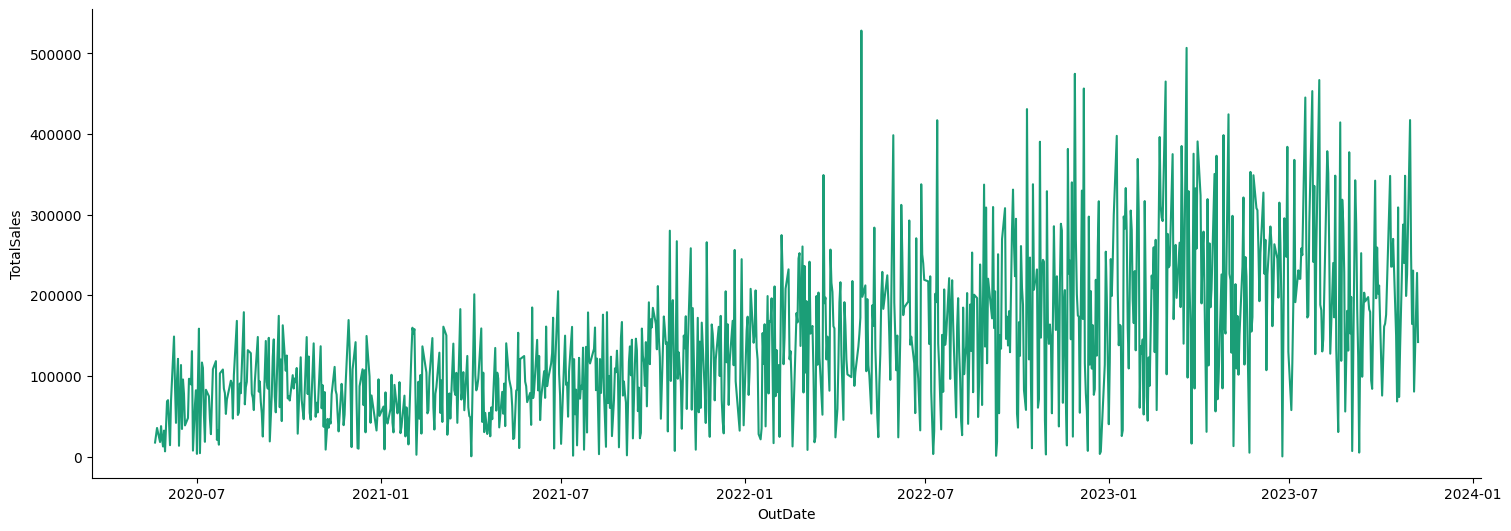

In [ ]:
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['OutDate']
  ys = series['TotalSales']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')
df_sorted = total_sales_df.sort_values('OutDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('OutDate')
_ = plt.ylabel('TotalSales')

In [ ]:
# Aggregate data for forecast by Sales category
sales_category_df = df.groupby(['OutDate', 'Sales'])['TotalSales'].sum().reset_index()
sales_category_df

,OutDate,Sales,TotalSales
0,2020-05-20,Aswathi Damodaran,0.00
1,2020-05-20,Becky Wang,0.00
2,2020-05-20,Cindy Wang,0.00
3,2020-05-20,Deepender Kaur,0.00
4,2020-05-20,James Wickware,0.00
...,...,...,...
16553,2023-11-07,Sarah JingLei Li,0.00
16554,2023-11-07,Terry Hein,0.00
16555,2023-11-07,Tony XiaoBai Li,6146.07
16556,2023-11-07,Wilson ChinWai Yip,0.00


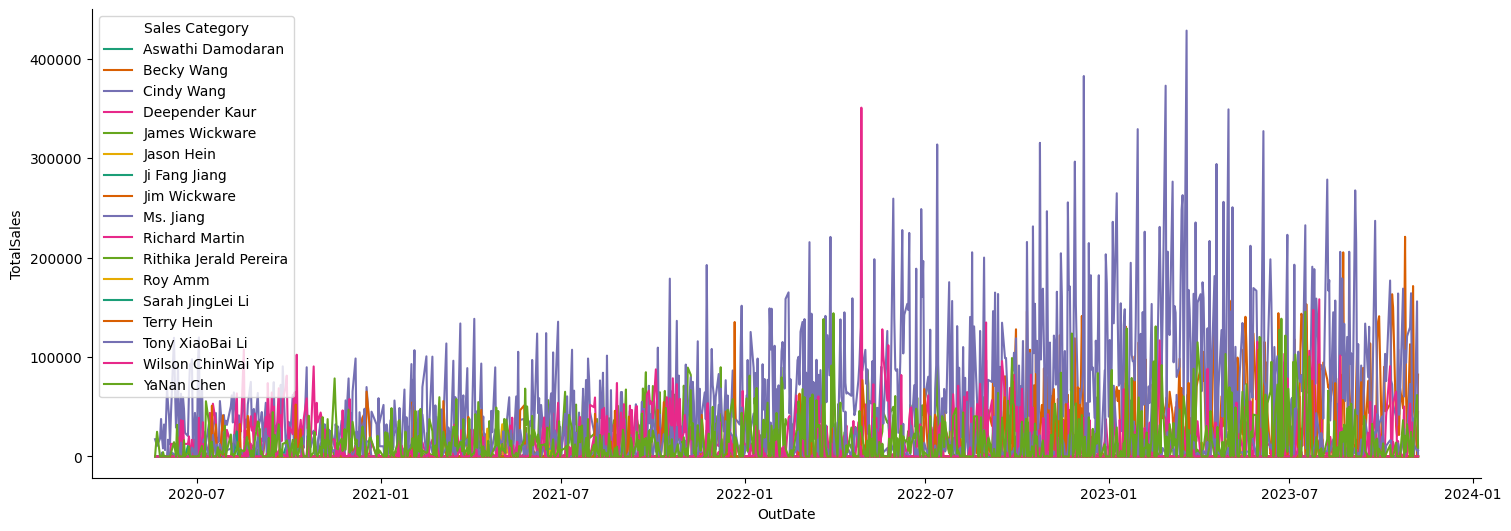

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5.2), layout='constrained')

# Get unique sales categories
sales_categories = sales_category_df['Sales'].unique()

# Plot each category
for index, category in enumerate(sales_categories):
    category_df = sales_category_df[sales_category_df['Sales'] == category].sort_values('OutDate', ascending=True)
    _plot_series(category_df, category, series_index=index)

# Finalize the plot
sns.despine(fig=fig, ax=ax)
plt.xlabel('OutDate')
plt.ylabel('TotalSales')
plt.legend(title='Sales Category')
plt.show()

### Feature Engineering

In [ ]:


total_sales_df = add_time_features(total_sales_df)
sales_category_df = add_time_features(sales_category_df)
total_sales_df

,OutDate,TotalSales,Year,Month,Day,Weekday
0,2020-05-20,17334.61,2020,5,20,2
1,2020-05-22,35447.07,2020,5,22,4
2,2020-05-25,18010.53,2020,5,25,0
3,2020-05-26,37692.22,2020,5,26,1
4,2020-05-27,22220.01,2020,5,27,2
...,...,...,...,...,...,...
969,2023-11-01,164366.04,2023,11,1,2
970,2023-11-02,230607.84,2023,11,2,3
971,2023-11-03,80516.91,2023,11,3,4
972,2023-11-06,227714.93,2023,11,6,0


In [ ]:
sales_category_df

,OutDate,Sales,TotalSales,Year,Month,Day,Weekday
0,2020-05-20,Aswathi Damodaran,0.00,2020,5,20,2
1,2020-05-20,Becky Wang,0.00,2020,5,20,2
2,2020-05-20,Cindy Wang,0.00,2020,5,20,2
3,2020-05-20,Deepender Kaur,0.00,2020,5,20,2
4,2020-05-20,James Wickware,0.00,2020,5,20,2
...,...,...,...,...,...,...,...
16553,2023-11-07,Sarah JingLei Li,0.00,2023,11,7,1
16554,2023-11-07,Terry Hein,0.00,2023,11,7,1
16555,2023-11-07,Tony XiaoBai Li,6146.07,2023,11,7,1
16556,2023-11-07,Wilson ChinWai Yip,0.00,2023,11,7,1


### Train-Test Split

In [ ]:
# Define a split date as a Timestamp object
split_date = pd.Timestamp('2023-01-01')

# For total forecast
train_total = total_sales_df[total_sales_df['OutDate'] < split_date]
test_total = total_sales_df[total_sales_df['OutDate'] >= split_date]

# For Sales category forecast
train_sales_category = sales_category_df[sales_category_df['OutDate'] < split_date]
# train_sales_category = train_data.asfreq('D', fill_value=0)

test_sales_category = sales_category_df[sales_category_df['OutDate'] >= split_date]

train_total.shape, test_total.shape, train_sales_category.shape, test_sales_category.shape

((740, 6), (234, 6), (12580, 7), (3978, 7))

### Model Training

#### a. Total Forecast Model


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X_train_total = train_total.drop(['TotalSales', 'OutDate'], axis=1)
y_train_total = train_total['TotalSales']

X_test_total = test_total.drop(['TotalSales', 'OutDate'], axis=1)
y_test_total = test_total['TotalSales']

# Train the model
model_total = LinearRegression()
model_total.fit(X_train_total, y_train_total)

LinearRegression()

In [ ]:
import statsmodels.api as sm

# Ensure 'OutDate' is the index and the data is sorted
# train_total = train_total.set_index('OutDate').sort_index()
# test_total = test_total.set_index('OutDate').sort_index()

# Set the frequency of the datetime index
train_total.index = pd.DatetimeIndex(train_total.index).to_period('D')
test_total.index = pd.DatetimeIndex(test_total.index).to_period('D')

# Define and fit the SARIMA model - example parameters, adjust based on your data
model_total = sm.tsa.statespace.SARIMAX(train_total['TotalSales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_total = model_total.fit()

#### b. Sales Category Forecast Model


In [ ]:
models_by_sales = {}

for sales_category in train_sales_category['Sales'].unique():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    X_train = train_data.drop(['TotalSales', 'OutDate', 'Sales'], axis=1)
    y_train = train_data['TotalSales']

    model = LinearRegression()
    model.fit(X_train, y_train)
    models_by_sales[sales_category] = model


In [ ]:
models_by_sales = {}

for sales_category in train_sales_category['Sales'].unique():
    train_data = train_sales_category[train_sales_category['Sales'] == sales_category]
    train_data.index = pd.DatetimeIndex(train_data.index).to_period('M')

    # Define and fit the SARIMA model for each category
    model = sm.tsa.statespace.SARIMAX(train_data['TotalSales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    models_by_sales[sales_category] = results

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Model Evaluation


#### a. Total Forecast Model Evaluation


In [ ]:
y_pred_total = model_total.predict(X_test_total)
mse_total = mean_squared_error(y_test_total, y_pred_total)
print(f'Total Forecast MSE: {mse_total}')

NotImplementedError: ignored

#### b. Sales Category Forecast Model Evaluation


In [ ]:
mse_by_sales = {}

for sales_category, model in models_by_sales.items():
    test_data = test_sales_category[test_sales_category['Sales'] == sales_category]
    X_test = test_data.drop(['TotalSales', 'OutDate', 'Sales'], axis=1)
    y_test = test_data['TotalSales']

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_by_sales[sales_category] = mse

for sales_category, mse in mse_by_sales.items():
    print(f'{sales_category} Forecast MSE: {mse}')


Aswathi Damodaran Forecast MSE: 282.26260836924337
Becky Wang Forecast MSE: 58800496.592382014
Cindy Wang Forecast MSE: 0.8733748126115264
Deepender Kaur Forecast MSE: 1605508.1380771836
James Wickware Forecast MSE: 515307266.29899246
Jason Hein Forecast MSE: 24196666.74930242
Ji Fang Jiang Forecast MSE: 48798.37189114975
Jim Wickware Forecast MSE: 3167000202.533108
Ms. Jiang Forecast MSE: 5904872404.219812
Richard Martin Forecast MSE: 681385275.4114953
Rithika Jerald Pereira Forecast MSE: 23845960.306657646
Roy Amm Forecast MSE: 13135.055871185674
Sarah JingLei Li Forecast MSE: 28269.87213548486
Terry Hein Forecast MSE: 286052627.4433601
Tony XiaoBai Li Forecast MSE: 211219099.63369244
Wilson ChinWai Yip Forecast MSE: 34902772.72206775
YaNan Chen Forecast MSE: 1104038583.4160838


### Forecasting


#### Creating Future Dates

In [ ]:
# Create a date range for 2024, assuming monthly forecasts
future_dates = pd.date_range(start='2023-11-08', end='2024-12-31', freq='MS')
future_dates_df = pd.DataFrame(future_dates, columns=['OutDate'])

# Add additional time features if they were used in the model
future_dates_df['Year'] = future_dates_df['OutDate'].dt.year
future_dates_df['Month'] = future_dates_df['OutDate'].dt.month
future_dates_df['Day'] = future_dates_df['OutDate'].dt.day
future_dates_df['Weekday'] = future_dates_df['OutDate'].dt.weekday

#### a. Total Forecast


In [ ]:
# Drop 'OutDate' as it was not used in the model
X_future_total = future_dates_df.drop(['OutDate'], axis=1)

# Make predictions
future_total_sales_predictions = model_total.predict(X_future_total)

# Combine predictions with dates for better readability
total_forecast = pd.DataFrame({
    'Date': future_dates_df['OutDate'],
    'Predicted Total Sales': future_total_sales_predictions
})

NotImplementedError: ignored

#### b. Sales Category Forecast


In [ ]:
future_sales_predictions = {}

for sales_category in train_sales_category['Sales'].unique():
    # Create a DataFrame for each category
    future_df = future_dates_df.copy()
    future_df['Sales'] = sales_category  # Add the sales category

    # Add any other necessary features or transformations

    # Prepare the data for the model
    X_future = future_df.drop(['OutDate', 'Sales'], axis=1)

    # Make predictions
    model = models_by_sales[sales_category]
    future_sales_predictions[sales_category] = model.predict(X_future)

    # Combine predictions with dates
    future_sales_predictions[sales_category] = pd.DataFrame({
        'Date': future_dates_df['OutDate'],
        'Predicted Sales for ' + sales_category: future_sales_predictions[sales_category]
    })


### Plotting

#### a. Plot actual and forecasted for Total

In [ ]:
# Historical data (up to 2023)
historical_sales_df = total_sales_df
historical_sales_df['OutDate'] = pd.to_datetime(historical_sales_df['OutDate'])
historical_sales_df = historical_sales_df.sort_values('OutDate')

# Forecasted data (for 2024)
total_forecast['Date'] = pd.to_datetime(total_forecast['Date'])

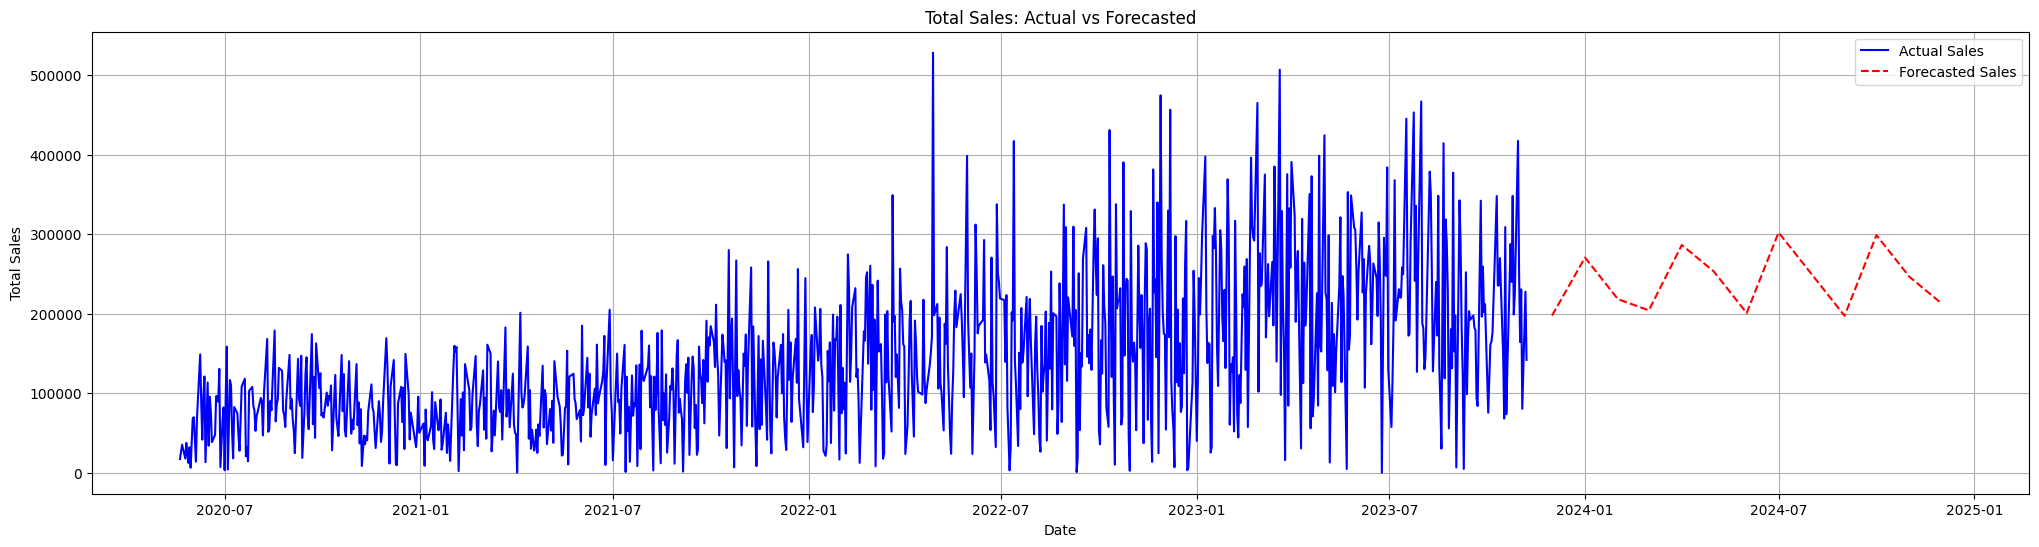

In [ ]:
plt.figure(figsize=(25, 6))

# Plot historical data
plt.plot(historical_sales_df['OutDate'], historical_sales_df['TotalSales'], label='Actual Sales', color='blue')

# Plot forecasted data
plt.plot(total_forecast['Date'], total_forecast['Predicted Total Sales'], label='Forecasted Sales', color='red', linestyle='--')

plt.title('Total Sales: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


#### b. Plot for Actual and Forecated for Sales Category

In [ ]:
# Convert 'OutDate' to datetime and sort
historical_sales_by_category_df = sales_category_df
historical_sales_by_category_df['OutDate'] = pd.to_datetime(historical_sales_by_category_df['OutDate'])
historical_sales_by_category_df = historical_sales_by_category_df.sort_values('OutDate')

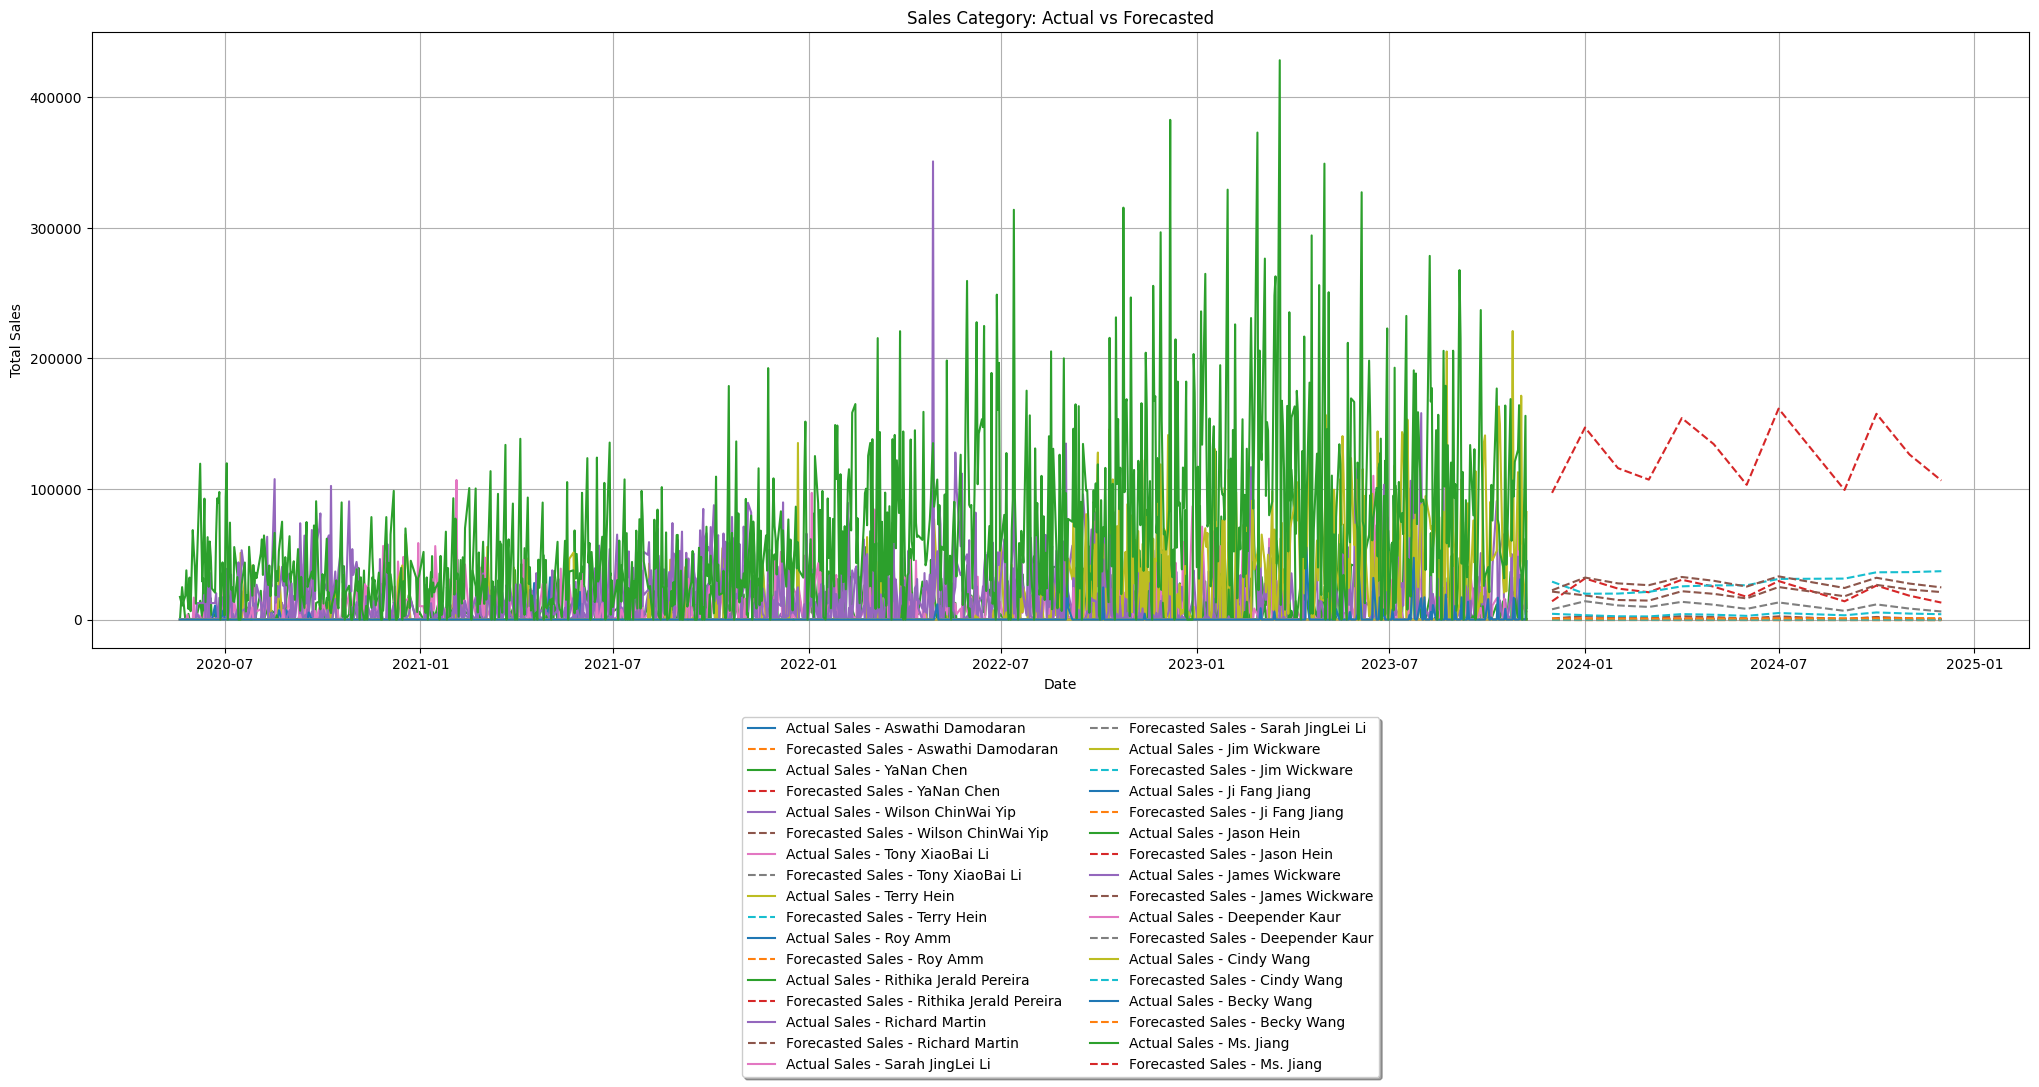

In [ ]:
sales_categories = historical_sales_by_category_df['Sales'].unique()

# Set up the plot
plt.figure(figsize=(25, 8))

for category in sales_categories:
    # Filter historical data for the category
    historical_data = historical_sales_by_category_df[historical_sales_by_category_df['Sales'] == category]

    # Filter forecasted data for the category
    forecast_data = future_sales_predictions[category]

    # Plot historical data
    plt.plot(historical_data['OutDate'], historical_data['TotalSales'], label=f'Actual Sales - {category}')

    # Plot forecasted data
    plt.plot(forecast_data['Date'], forecast_data[f'Predicted Sales for {category}'], label=f'Forecasted Sales - {category}', linestyle='--')

plt.title('Sales Category: Actual vs Forecasted')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Place the legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)

plt.grid(True)
plt.show()



### Save data to csv

In [ ]:
total_sales_df.to_csv('total_sales_df.csv')

In [ ]:
total_forecast.to_csv('total_forecast.csv')

In [ ]:
historical_sales_by_category_df.to_csv('historical_sales_by_category_df.csv')

In [ ]:
future_sales_predictions.to_csv('future_sales_predictions.csv')

AttributeError: ignored

In [ ]:
# Group by Sales
grouped_df = df.groupby(['OutDate', 'Sales']).agg({
    'OutCountTotal': 'sum',
    'TotalSales': 'sum',b
    'TotalSales_LocalPrice': 'sum'
}).reset_index()

# grouped_df.set_index('OutDate', inplace=True)
# grouped_df.sort_index(inplace=True)

grouped_df['OutDate'] = pd.to_datetime(grouped_df['OutDate'])
grouped_df.set_index('OutDate', inplace=True)

grouped_df.head()

,Sales,OutCountTotal,TotalSales,TotalSales_LocalPrice
OutDate,,,,
2020-05-20,Ms. Jiang,63200.0,17334.61,17334.61
2020-05-22,Ms. Jiang,34520.0,10616.00,10616.00
2020-05-22,YaNan Chen,100800.0,24831.07,24831.07
2020-05-25,Ms. Jiang,65700.0,18010.53,18010.53
2020-05-26,Ms. Jiang,114100.0,37692.22,37692.22


In [ ]:
grouped_df.dtypes

Sales                     object
OutCountTotal            float64
TotalSales               float64
TotalSales_LocalPrice    float64
dtype: object

In [ ]:
print("NaN values in the data:", df.isna().sum())

NaN values in the data: OutDate                    0
Sales                      0
Customer                   0
Product                    0
ProductID                270
OutCountTotal              0
TotalSales                 0
TotalSales_LocalPrice      0
dtype: int64


In [ ]:
# # Define a split date as a Timestamp object
# split_date = pd.Timestamp('2023-01-01')

# # Perform the split without setting OutDate as index
# train = grouped_df[grouped_df['OutDate'] < split_date]
# test = grouped_df[grouped_df['OutDate'] >= split_date]

# Splitting data into training and test sets
train = grouped_df[grouped_df.index.year <= 2022]  # Data up to the end of 2022
test = grouped_df[grouped_df.index.year == 2023]   # Data for 2023

In [ ]:
train.head()

,Sales,OutCountTotal,TotalSales,TotalSales_LocalPrice
OutDate,,,,
2020-05-20,Ms. Jiang,63200.0,17334.61,17334.61
2020-05-22,Ms. Jiang,34520.0,10616.00,10616.00
2020-05-22,YaNan Chen,100800.0,24831.07,24831.07
2020-05-25,Ms. Jiang,65700.0,18010.53,18010.53
2020-05-26,Ms. Jiang,114100.0,37692.22,37692.22


In [ ]:
test.head()

,Sales,OutCountTotal,TotalSales,TotalSales_LocalPrice
OutDate,,,,
2023-01-01,Ms. Jiang,301080.0,40058.42,40058.42
2023-01-02,Ms. Jiang,917170.0,117123.44,117123.44
2023-01-03,Jim Wickware,243300.0,44035.38,44035.38
2023-01-03,Ms. Jiang,216000.0,31271.53,31271.53
2023-01-03,Richard Martin,84700.0,5604.84,5604.84


In [ ]:
from statsmodels.tsa.stattools import adfuller

def diagnose_model(train_data, test_data, column_to_forecast):
    # Fit the SARIMAX model
    order = (1, 1, 1)  # ARIMA model hyperparameters
    seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA model hyperparameters
    model = SARIMAX(train_data[column_to_forecast], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Display the model summary
    print(results.summary())

    # Check for stationarity
    adf_test = adfuller(train_data[column_to_forecast])
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    for key, value in adf_test[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')

    # Check if the forecast index has duplicates or irregularities
    forecast_index = pd.date_range(start=train_data.index[-1], periods=len(test_data) + 1, freq='D')[1:]
    print("\nDuplicates in the forecast index:", forecast_index.duplicated().any())
    print("Forecast index type:", forecast_index.dtype)

# Perform the diagnostic for each of the specified columns
for column in ['OutCountTotal', 'TotalSales', 'TotalSales_LocalPrice']:
    diagnose_model(train, test, column)


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39216D+01    |proj g|=  1.27161D-01

At iterate    5    f=  1.38585D+01    |proj g|=  1.00321D-02

At iterate   10    f=  1.38512D+01    |proj g|=  3.77852D-04

At iterate   15    f=  1.38509D+01    |proj g|=  1.07558D-03

At iterate   20    f=  1.38508D+01    |proj g|=  6.86011D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   6.860D-06   1.385D+01
  F =   13.850824392009642     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20620D+01    |proj g|=  1.24691D-01

At iterate    5    f=  1.20015D+01    |proj g|=  9.92805D-03

At iterate   10    f=  1.19942D+01    |proj g|=  3.80397D-04

At iterate   15    f=  1.19939D+01    |proj g|=  3.32607D-03

At iterate   20    f=  1.19938D+01    |proj g|=  1.06555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.066D-05   1.199D+01
  F =   11.993837003509412     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20681D+01    |proj g|=  1.23304D-01

At iterate    5    f=  1.20081D+01    |proj g|=  1.10030D-02

At iterate   10    f=  1.19999D+01    |proj g|=  4.06838D-04

At iterate   15    f=  1.19995D+01    |proj g|=  1.91009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.084D-05   1.200D+01
  F =   11.999497874224071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

In [ ]:
def troubleshoot_forecast(train_data, test_data, column_to_forecast):
    # Fit the SARIMAX model
    order = (1, 1, 1)  # ARIMA model hyperparameters
    seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA model hyperparameters
    model = SARIMAX(train_data[column_to_forecast], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Get the forecast
    forecast = results.get_forecast(steps=len(test_data))
    forecast_index = pd.date_range(start=train_data.index[-1], periods=len(test_data) + 1, freq='D')[1:]
    forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=[f'Forecast_{column_to_forecast}'])

    # Check for NaNs in forecast
    print(f"NaNs in forecast for {column_to_forecast}:")
    print(forecast_df.isna().sum())

    # Verify forecast index
    print(f"\nForecast index for {column_to_forecast}:")
    print(forecast_index)

    # Verify test data index
    print(f"\nTest data index for {column_to_forecast}:")
    print(test_data.index)

# Perform troubleshooting for each of the specified columns
for column in ['OutCountTotal', 'TotalSales', 'TotalSales_LocalPrice']:
    troubleshoot_forecast(train, test, column)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39216D+01    |proj g|=  1.27161D-01


 This problem is unconstrained.



At iterate    5    f=  1.38585D+01    |proj g|=  1.00321D-02

At iterate   10    f=  1.38512D+01    |proj g|=  3.77852D-04

At iterate   15    f=  1.38509D+01    |proj g|=  1.07558D-03

At iterate   20    f=  1.38508D+01    |proj g|=  6.86011D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   6.860D-06   1.385D+01
  F =   13.850824392009642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
NaNs in forecast for OutCountTotal:
Forecast_OutCountTotal    916
dtype: int64

Forecast index for OutCountTotal:
DatetimeIndex(['1970-01-02 00:00:00.000002837',
             

 This problem is unconstrained.



At iterate    5    f=  1.20015D+01    |proj g|=  9.92805D-03

At iterate   10    f=  1.19942D+01    |proj g|=  3.80397D-04

At iterate   15    f=  1.19939D+01    |proj g|=  3.32607D-03

At iterate   20    f=  1.19938D+01    |proj g|=  1.06555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.066D-05   1.199D+01
  F =   11.993837003509412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
NaNs in forecast for TotalSales:
Forecast_TotalSales    916
dtype: int64

Forecast index for TotalSales:
DatetimeIndex(['1970-01-02 00:00:00.000002837',
               '1970-0

 This problem is unconstrained.



At iterate    0    f=  1.20681D+01    |proj g|=  1.23304D-01

At iterate    5    f=  1.20081D+01    |proj g|=  1.10030D-02

At iterate   10    f=  1.19999D+01    |proj g|=  4.06838D-04

At iterate   15    f=  1.19995D+01    |proj g|=  1.91009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.084D-05   1.200D+01
  F =   11.999497874224071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
NaNs in forecast for TotalSales_LocalPrice:
Forecast_TotalSales_LocalPrice    916
dtype: int64

Forecast index for TotalSales_LocalPrice:
DatetimeIndex(['1970-01-02 00:00:00.0

In [ ]:
def perform_forecast(train_data, test_data, column_to_forecast):
    # Fit the SARIMAX model
    order = (1, 1, 1)  # ARIMA model hyperparameters
    seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA model hyperparameters
    model = SARIMAX(train_data[column_to_forecast], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Perform forecast
    forecast = results.get_forecast(steps=len(test_data))
    forecast_df = pd.DataFrame(forecast.predicted_mean, index=test_data.index, columns=[f'Forecast_{column_to_forecast}'])

    # Ensure test_data has the same index as forecast_df for proper alignment
    test_data = test_data.reindex(forecast_df.index)

    # Drop any rows with NaN values in either the test data or the forecast
    combined_df = pd.concat([test_data[column_to_forecast], forecast_df], axis=1).dropna()

    # If combined_df is empty, there's an issue with the data alignment
    if combined_df.empty:
        raise ValueError(f"No overlapping data to evaluate for column {column_to_forecast}")

    # Evaluate the forecast
    mae = mean_absolute_error(combined_df[column_to_forecast], combined_df.iloc[:, 1])
    print(f'Mean Absolute Error for {column_to_forecast}: {mae}')

    # Plot the forecast against the actual values
    plt.figure(figsize=(10, 5))
    train_data[column_to_forecast].plot(label='Train', legend=True)
    combined_df[column_to_forecast].plot(label='Test', legend=True, alpha=0.7)
    combined_df.iloc[:, 1].plot(label='Forecast', legend=True, color='red', alpha=0.7)

    plt.title(f'Forecast vs Actuals for {column_to_forecast}')
    plt.show()

In [ ]:
# Perform forecasting for each of the specified columns
for column in ['OutCountTotal', 'TotalSales', 'TotalSales_LocalPrice']:
    perform_forecast(train, test, column)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39216D+01    |proj g|=  1.27161D-01


 This problem is unconstrained.



At iterate    5    f=  1.38585D+01    |proj g|=  1.00321D-02

At iterate   10    f=  1.38512D+01    |proj g|=  3.77852D-04

At iterate   15    f=  1.38509D+01    |proj g|=  1.07558D-03

At iterate   20    f=  1.38508D+01    |proj g|=  6.86011D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   6.860D-06   1.385D+01
  F =   13.850824392009642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


ValueError: No overlapping data to evaluate for column OutCountTotal

In [ ]:
def create_forecast_model(train_data, column_to_forecast, forecast_periods):
    # Fit the SARIMAX model
    order = (1, 1, 1)  # ARIMA model hyperparameters
    seasonal_order = (1, 1, 1, 12)  # Seasonal ARIMA model hyperparameters
    model = SARIMAX(train_data[column_to_forecast], order=order, seasonal_order=seasonal_order)
    results = model.fit()

    # Generate forecast
    forecast = results.get_forecast(steps=forecast_periods)
    forecast_index = pd.date_range(start=train_data.index[-1], periods=forecast_periods + 1, freq='D')[1:]
    forecast_df = pd.DataFrame(forecast.predicted_mean, index=forecast_index, columns=[f'Forecast_{column_to_forecast}'])

    return forecast_df

In [ ]:
# Forecasting for each column
forecast_periods = len(test)  # Number of periods in 2023 in your dataset
forecasts = {}
for column in ['OutCountTotal', 'TotalSales', 'TotalSales_LocalPrice']:
    forecasts[column] = create_forecast_model(train, column, forecast_periods)

# Accessing forecasted data
outcount_forecast = forecasts['OutCountTotal']
totalsales_forecast = forecasts['TotalSales']
totalsales_localprice_forecast = forecasts['TotalSales_LocalPrice']

print(outcount_forecast)

/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39216D+01    |proj g|=  1.27161D-01

At iterate    5    f=  1.38585D+01    |proj g|=  1.00321D-02

At iterate   10    f=  1.38512D+01    |proj g|=  3.77852D-04

At iterate   15    f=  1.38509D+01    |proj g|=  1.07558D-03

At iterate   20    f=  1.38508D+01    |proj g|=  6.86011D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   6.860D-06   1.385D+01
  F =   13.850824392009642     

CONVERG

/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20620D+01    |proj g|=  1.24691D-01

At iterate    5    f=  1.20015D+01    |proj g|=  9.92805D-03

At iterate   10    f=  1.19942D+01    |proj g|=  3.80397D-04

At iterate   15    f=  1.19939D+01    |proj g|=  3.32607D-03

At iterate   20    f=  1.19938D+01    |proj g|=  1.06555D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   1.066D-05   1.199D+01
  F =   11.993837003509412     

CONVERG

/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20681D+01    |proj g|=  1.23304D-01

At iterate    5    f=  1.20081D+01    |proj g|=  1.10030D-02

At iterate   10    f=  1.19999D+01    |proj g|=  4.06838D-04

At iterate   15    f=  1.19995D+01    |proj g|=  1.91009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.084D-05   1.200D+01
  F =   11.999497874224071     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

/Users/Phoestia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
